In [43]:
import pandas as pd
import math

In [30]:
df = pd.read_csv('/content/drive/MyDrive/Creditcard_data.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
from sklearn.preprocessing import normalize
Amount = normalize([df['Amount']])[0]
df['Amount'] = Amount
df = df.iloc[:, 1:]
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.025729,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000463,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.065115,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.021237,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.012036,0


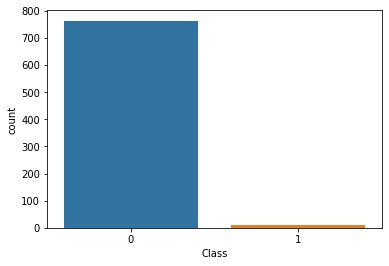

In [35]:
import seaborn as sns
sns.countplot(x='Class', data=df)

In [38]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target
X = df.iloc[:,:29]
Y = df.iloc[:,29]

# Instantiate oversampler and undersampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=1)

# Resample using both oversampling and undersampling
X,Y=over.fit_resample(X,Y)
X,Y=under.fit_resample(X,Y)


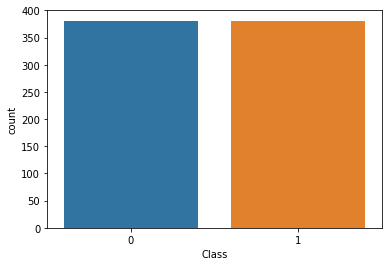

In [42]:
new_df=pd.concat([X,Y],axis=1)
sns.countplot(x='Class', data=new_df)

In [46]:
#Let confidence level=90%
#let error = 10%
import scipy.stats as st
p=0.50
e=0.10
Z=round(st.norm.ppf(1-(1-0.90)/2),4)

In [47]:
#Sample 1 - Simple Random Sampling
size=math.floor(Z*Z*p*(1-p)/(e*e))
sample1=new_df.sample(n=size, random_state=0)
sample1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
621,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,-0.328631,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,0.000258,1
350,-0.743471,0.943604,1.486464,-0.179575,-0.190966,-0.295559,0.352438,0.354958,-0.110108,0.192907,...,-0.195239,-0.553503,0.055946,0.134419,-0.356895,0.083846,0.372062,0.162031,0.000765,0
518,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000463,1
40,0.150999,-3.002120,0.824301,0.231721,-2.621415,0.128843,-0.755233,0.095956,0.638219,0.096462,...,0.521719,0.320297,-0.591253,0.447557,0.164080,-0.131897,-0.047547,0.130266,0.105199,0
263,-0.602483,0.479089,0.549750,-1.069814,-0.501687,0.214778,-0.139683,0.558440,-1.914257,0.395764,...,0.433866,1.039252,-0.025035,-0.260748,-0.456975,-0.117581,-0.073710,0.055204,0.007362,0


In [49]:
# Sample 2 - Systematic Sampling

step_size=8
sample2=new_df.iloc[::step_size]
sample2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,-0.230873,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,0.241253,0
8,-1.427152,-0.527766,2.460153,-2.807482,-0.457111,-1.365709,0.516031,-0.132601,1.654159,-1.861969,...,0.175522,0.575655,-0.111697,0.752948,0.675004,-0.162286,0.058107,-0.086261,0.017368,0
16,-0.703183,1.210704,0.713731,1.146381,0.196790,0.468060,0.204977,0.627389,-0.296261,-0.309001,...,-0.052939,0.044339,-0.184853,-0.776439,0.021548,-0.166427,0.297892,0.128381,0.002406,0
24,1.171488,0.111367,0.358994,0.210844,-0.560816,-1.408542,0.354584,-0.353311,-0.118270,-0.226567,...,-0.454727,-1.451831,0.265729,0.715640,-0.033477,0.285188,-0.080931,0.024925,0.009415,0
32,-5.101877,1.897022,-3.458034,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,-0.305483,...,-0.871744,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,0.158136,0


In [53]:
# Sampling 3 - Stratified Sampling
from sklearn.model_selection import train_test_split
size1 = math.floor((Z*Z*p*(1-p))/(e*e))
strata = new_df.groupby('Class')

# sample 2 rows from each stratum
sample3 = strata.apply(lambda x: x.sample(size1))

sample3.head()

V1        V2        V3        V4        V5        V6  \
Class                                                                   
0     72   1.197839  0.236828  0.509605  0.657659 -0.365488 -0.745101   
      243  1.146594 -0.353208  0.834120  0.708139 -0.749014  0.189676   
      256 -0.246046  0.473267  1.695738  0.262411 -0.010866 -0.610836   
      345 -0.847998  1.043459  1.267369  1.135529  0.021362  0.336914   
      281 -0.343711  1.118615  1.293386  0.064762  0.023481 -0.992741   

                 V7        V8        V9       V10  ...       V21       V22  \
Class                                              ...                       
0     72   0.079497 -0.130536 -0.052263 -0.110058  ... -0.149876 -0.374211   
      243 -0.593212  0.126902  1.015718 -0.255134  ... -0.120062 -0.268422   
      256  0.793937 -0.247253  0.138879 -0.401007  ... -0.194600 -0.335133   
      345  0.398480  0.317399 -0.028658  0.534033  ... -0.024046  0.215006   
      281  0.695814 -0.064809 -0.373640 -0.506204  ... -0.265392 -0.700550   

                V23       V24       V25       V26       V27       V28  \
Class                                                                   
0     72   0.145516  0.414984  0.212156  0.181724 -0.016402  0.015994   
      243 -0.112320 -0.410470  0.341273  0.364006  0.005175  0.026810   
      256 -0.078180  0.392784 -0.031157  0.198037 -0.175347 -0.203616   
      345 -0.131982 -0.007416 -0.136578 -0.242961  0.382931  0.276417   
      281 -0.014280  0.330615 -0.165442  0.072342  0.244882  0.098048   

             Amount  Class  
Class                       
0     72   0.000624      0  
      243  0.009888      0  
      256  0.005243      0  
      345  0.003477      0  
      281  0.000392      0  

[5 rows x 30 columns]

In [59]:
# Sample 4 - Cluster sampling
import numpy as np
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(new_df)
cluster_assignments = kmeans.labels_
selected_clusters = [1,5,8]
cluster_series = pd.Series(cluster_assignments)
sample4 = new_df[cluster_series.isin(selected_clusters)]
sample4

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,-0.487234,0.505825,0.880670,0.972986,0.823367,0.287738,0.725039,0.021040,-0.268138,-0.367036,...,-0.052209,-0.129567,-0.177153,-1.004116,0.169317,-0.234252,0.129244,0.139251,0.011583,0
3,-0.556245,0.657574,2.706193,2.792656,0.208496,0.908663,0.074210,0.065530,-0.757281,0.651018,...,0.105614,0.489549,-0.328685,-0.427097,0.207280,0.413055,-0.058339,-0.125352,0.006528,0
6,-0.443640,0.981193,1.234397,0.099497,-0.051270,-0.927441,0.862786,-0.097128,-0.442318,-0.556098,...,-0.230772,-0.677442,0.099784,0.334204,-0.132780,0.069674,0.229407,0.102884,0.008596,0
14,-0.143256,0.743649,1.534072,1.062170,0.208187,-0.838623,0.524151,-0.294661,-0.478856,-0.006097,...,-0.205014,-0.460893,0.047407,0.339243,-0.779439,0.234456,-0.024125,-0.049898,0.000340,0
15,-0.355221,1.155882,1.311865,0.061945,0.114207,-0.990220,0.728195,-0.105630,-0.486183,-0.525351,...,-0.255803,-0.639619,-0.022676,0.351456,-0.139464,0.069852,0.249580,0.099988,0.000153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,-0.142617,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.000170,1
722,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.090968,1
735,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.090968,1
744,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.090968,1


In [57]:
# Sample 5 -  Convenience Sampling
sample5 = pd.concat([new_df.head(50), new_df.tail(50)])
sample5

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,-0.230873,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,0.241253,0
1,-0.487234,0.505825,0.880670,0.972986,0.823367,0.287738,0.725039,0.021040,-0.268138,-0.367036,...,-0.052209,-0.129567,-0.177153,-1.004116,0.169317,-0.234252,0.129244,0.139251,0.011583,0
2,-0.546215,0.878084,1.523176,-0.242853,0.323931,0.371852,0.446595,0.370077,-0.631359,-0.229070,...,-0.120936,-0.268618,0.036313,-0.312671,-0.378051,0.113660,0.292121,0.103730,0.001109,0
3,-0.556245,0.657574,2.706193,2.792656,0.208496,0.908663,0.074210,0.065530,-0.757281,0.651018,...,0.105614,0.489549,-0.328685,-0.427097,0.207280,0.413055,-0.058339,-0.125352,0.006528,0
4,-4.257597,1.649489,-1.591242,-1.374317,-1.180136,-0.331040,-0.117992,1.592032,0.415996,0.159163,...,-0.452568,-0.671703,0.001422,-0.876377,0.070098,0.729582,-0.002942,-0.481497,0.021438,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,-0.286012,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,0.000222,1
758,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,-0.574775,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,0.000172,1
759,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000463,1
760,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,-0.328631,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,0.000258,1


In [61]:
samples=[sample1, sample2, sample3, sample4, sample5]

In [65]:
#Model 1 - KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model1=KNeighborsClassifier(n_neighbors=5)
scores1=[]
for sample in samples:
  x=sample.iloc[:,:29]
  y=sample.iloc[:,29]
  x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30,random_state=42)
  model1.fit(x_train,y_train)
  ypred=model1.predict(x_test)
  scores1.append(round(accuracy_score(ypred,y_test),5))
scores1

[0.52381, 0.65517, 0.70732, 0.98148, 0.7]

In [66]:
#Model 2 - Logistic Regression
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression(random_state=0)
scores2=[]
for sample in samples:
  x=sample.iloc[:,:29]
  y=sample.iloc[:,29]
  x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30,random_state=42)
  model2.fit(x_train,y_train)
  ypred=model2.predict(x_test)
  scores2.append(round(accuracy_score(ypred,y_test),5))
scores2

[0.95238, 0.86207, 0.73171, 1.0, 0.73333]

In [68]:
#Model 3 - Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(random_state=0)
scores3=[]
for sample in samples:
  x=sample.iloc[:,:29]
  y=sample.iloc[:,29]
  x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30,random_state=42)
  model3.fit(x_train,y_train)
  ypred=model3.predict(x_test)
  scores3.append(round(accuracy_score(ypred,y_test),5))
scores3

[0.85714, 0.93103, 0.92683, 0.96296, 0.9]

In [69]:
#Model 4 - Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier(max_depth=4, random_state=0)
scores4=[]
for sample in samples:
  x=sample.iloc[:,:29]
  y=sample.iloc[:,29]
  x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30,random_state=42)
  model4.fit(x_train,y_train)
  ypred=model4.predict(x_test)
  scores4.append(round(accuracy_score(ypred,y_test),5))
scores4

[0.90476, 1.0, 0.92683, 1.0, 0.9]

In [72]:
#Model 5 - Naive Bayes
from sklearn.naive_bayes import GaussianNB
model5=GaussianNB()
scores5=[]
for sample in samples:
  x=sample.iloc[:,:29]
  y=sample.iloc[:,29]
  x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30,random_state=42)
  model5.fit(x_train,y_train)
  ypred=model5.predict(x_test)
  scores5.append(round(accuracy_score(ypred,y_test),5))
scores5

[0.7619, 0.65517, 0.63415, 1.0, 0.6]

In [80]:
#combining to form a table
report=[]
report.append(scores1)
report.append(scores2)
report.append(scores3)
report.append(scores4)
report.append(scores5)
report=pd.DataFrame(report)

In [81]:
model_name=pd.DataFrame(['KNN','LR','Decision Tree', 'Random Forest', 'Naive Bayes'])
report=pd.concat([model_name, report], axis=1)

In [83]:
report.columns=['Model Name', 'Simple Random', 'Systematic', 'Stratified', 'Cluster', 'Convenience']
report

,Model Name,Simple Random,Systematic,Stratified,Cluster,Convenience
0,KNN,0.52381,0.65517,0.70732,0.98148,0.70000
1,LR,0.95238,0.86207,0.73171,1.00000,0.73333
2,Decision Tree,0.85714,0.93103,0.92683,0.96296,0.90000
3,Random Forest,0.90476,1.00000,0.92683,1.00000,0.90000
4,Naive Bayes,0.76190,0.65517,0.63415,1.00000,0.60000
